In [1]:
## 기본모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 모듈 import
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
from keras.datasets import mnist

In [2]:
## dataset 정리
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = .2)

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)

(48000, 28, 28)
(48000,)


7

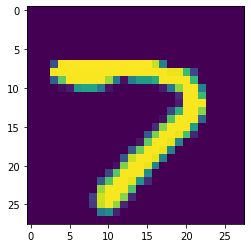

In [5]:
plt.imshow(X_train[0])
y_train[0]

In [6]:
X_train.shape

(48000, 28, 28)

In [7]:
x = X_train.reshape(-1,784*1000)

In [8]:
y = x.reshape(48000,28,28)

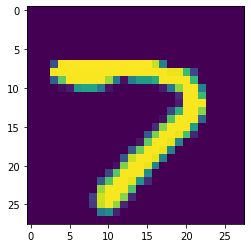

In [9]:
plt.imshow(y[0])

In [10]:
# X 데이터 정리
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1,784)
X_test = X_test.reshape(-1, 784)

In [11]:
# y 데이터 확인 정리
np.unique(y_train).size
# categorical 데이터 확인
# one-hot 변환
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [12]:
## 모델 생성
model1 = Sequential()
model1.add(Dense(1024,activation='relu',input_dim=784))
model1.add(Dense(512,activation='sigmoid'))
model1.add(Dense(10,activation='softmax'))

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


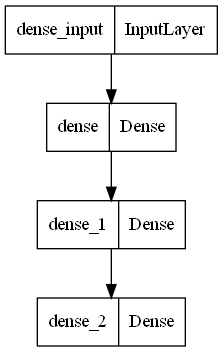

In [14]:
plot_model(model1)

In [15]:
## 모델 설정
optimizer = 'sgd'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model1.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = metrics
)

In [16]:
### 모델 학습
model1.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_val, y_val)
)

Epoch 1/10
1500/1500 [==============================] - 26s 16ms/step - loss: 0.4053 - accuracy: 0.8925 - val_loss: 0.2502 - val_accuracy: 0.9255
Epoch 2/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2002 - accuracy: 0.9438 - val_loss: 0.1903 - val_accuracy: 0.9433
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1508 - accuracy: 0.9574 - val_loss: 0.1601 - val_accuracy: 0.9503
Epoch 4/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1213 - accuracy: 0.9654 - val_loss: 0.1468 - val_accuracy: 0.9572
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0993 - accuracy: 0.9723 - val_loss: 0.1245 - val_accuracy: 0.9626
Epoch 6/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0844 - accuracy: 0.9760 - val_loss: 0.1178 - val_accuracy: 0.9629
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0679 - accuracy: 0.9819 - val_loss: 0.1079 -

In [17]:
## test 정확도 검증
model1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0807 - accuracy: 0.9743


[0.08068614453077316, 0.9743000268936157]

In [18]:
np.sum(np.argmax(model1.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/y_test.size

313/313 [==============================] - 2s 6ms/step


0.09743

In [19]:
## 활용
def mnist_test(x):
    ind = np.random.choice(np.arange(len(X_test)),x,replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.argmax(model1.predict(X_test[[i]]))
        real = np.argmax(y_test[i])
        if pred == real:
            result = '맞음'
            score += 1
        else:
            result = '틀림'
        score = (score/size)*100
        print(f'정답은 ===> {real} 예측은 ===> {pred} 결과는 ===> {result}')
        plt.show()
    print('\n',f' 총 {size}를 예측한 결과 예측율은 {score} %')

1/1 [==============================] - 0s 22ms/step
정답은 ===> 1 예측은 ===> 1 결과는 ===> 맞음


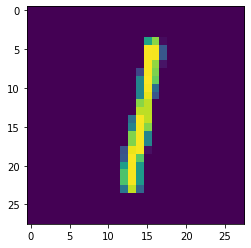

1/1 [==============================] - 0s 27ms/step
정답은 ===> 5 예측은 ===> 5 결과는 ===> 맞음


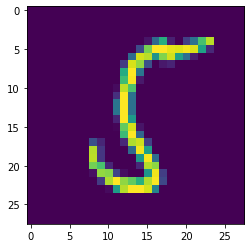

1/1 [==============================] - 0s 22ms/step
정답은 ===> 7 예측은 ===> 7 결과는 ===> 맞음


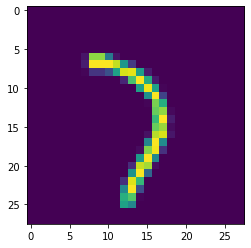

1/1 [==============================] - 0s 23ms/step
정답은 ===> 8 예측은 ===> 8 결과는 ===> 맞음


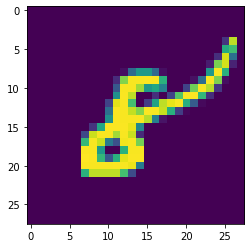

1/1 [==============================] - 0s 32ms/step
정답은 ===> 9 예측은 ===> 9 결과는 ===> 맞음


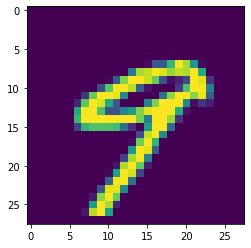

1/1 [==============================] - 0s 19ms/step
정답은 ===> 2 예측은 ===> 2 결과는 ===> 맞음


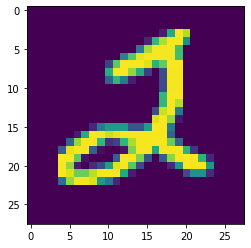

1/1 [==============================] - 0s 32ms/step
정답은 ===> 7 예측은 ===> 7 결과는 ===> 맞음


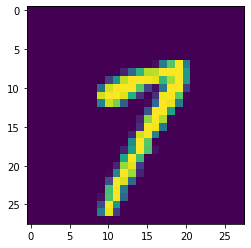

1/1 [==============================] - 0s 26ms/step
정답은 ===> 6 예측은 ===> 6 결과는 ===> 맞음


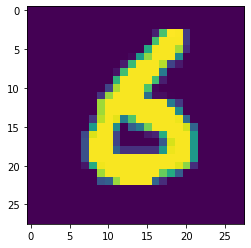

1/1 [==============================] - 0s 32ms/step
정답은 ===> 9 예측은 ===> 9 결과는 ===> 맞음


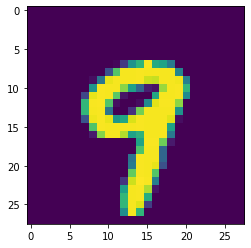

1/1 [==============================] - 0s 24ms/step
정답은 ===> 6 예측은 ===> 6 결과는 ===> 맞음


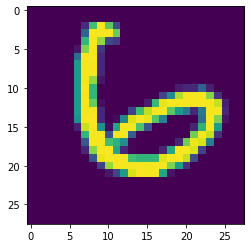


  총 10를 예측한 결과 예측율은 11111111110.000002 %


In [20]:
mnist_test(10)

### val 데이터로 예측율 확인

In [21]:
### 모델 학습
model1.fit(
    X_val,
    y_val,
    epochs = 10,
    validation_data = (X_train, y_train)
)

Epoch 1/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0961 - accuracy: 0.9700 - val_loss: 0.0488 - val_accuracy: 0.9887
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0715 - accuracy: 0.9805 - val_loss: 0.0443 - val_accuracy: 0.9891
Epoch 3/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0526 - accuracy: 0.9858 - val_loss: 0.0426 - val_accuracy: 0.9892
Epoch 4/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0390 - accuracy: 0.9914 - val_loss: 0.0401 - val_accuracy: 0.9895
Epoch 5/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0275 - accuracy: 0.9949 - val_loss: 0.0399 - val_accuracy: 0.9900
Epoch 6/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0201 - accuracy: 0.9968 - val_loss: 0.0385 - val_accuracy: 0.9898
Epoch 7/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0152 - accuracy: 0.9977 - val_loss: 0.0379 - val_accuracy:

In [22]:
## test 정확도 검증
model1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0776 - accuracy: 0.9752


[0.07756783068180084, 0.9751999974250793]

In [23]:
## 활용
def mnist_val(x):
    ind = np.random.choice(np.arange(len(X_val)),x,replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_val[i].reshape(28,28))
        pred = np.argmax(model1.predict(X_val[[i]]))
        real = np.argmax(y_val[i])
        if pred == real:
            result = '맞음'
            score += 1
        else:
            result = '틀림'
        score = (score/size)*100
        print(f'정답은 ===> {real} 예측은 ===> {pred} 결과는 ===> {result}')
        plt.show()
    print('\n',f' 총 {size}를 예측한 결과 예측율은 {score} %')

1/1 [==============================] - 0s 31ms/step
정답은 ===> 3 예측은 ===> 3 결과는 ===> 맞음


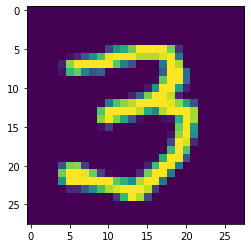

1/1 [==============================] - 0s 27ms/step
정답은 ===> 5 예측은 ===> 5 결과는 ===> 맞음


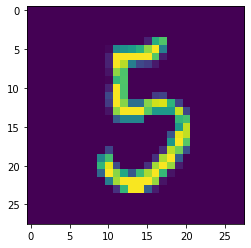

1/1 [==============================] - 0s 33ms/step
정답은 ===> 7 예측은 ===> 7 결과는 ===> 맞음


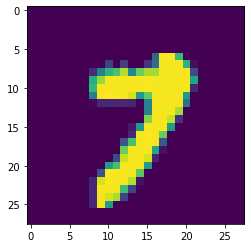

1/1 [==============================] - 0s 31ms/step
정답은 ===> 1 예측은 ===> 1 결과는 ===> 맞음


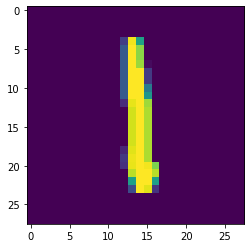

1/1 [==============================] - 0s 29ms/step
정답은 ===> 8 예측은 ===> 8 결과는 ===> 맞음


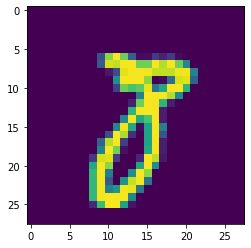


  총 5를 예측한 결과 예측율은 3368419.9999999995 %


In [24]:
mnist_val(5)

### model2(1, 7, 9를 기생충으로 판별)

In [25]:
model2 = Sequential()

In [160]:
# model2.compile(optimizer=keras.optimizers.SGE(),
#                loss = keras.losses.CategoricalCrossentropy())

In [26]:
model2.compile(optimizer='sgd',
               loss = 'binary_crossentropy')

In [27]:
dir(keras.losses)

['BinaryCrossentropy',
 'BinaryFocalCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'binary_crossentropy',
 'binary_focal_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'sparse_categorical_crossen

In [28]:
from keras.datasets import mnist

In [29]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [30]:
y_train_full = np.where((y_train_full == 1) | (y_train_full == 7) | (y_train_full == 9)
                        ,1,0)
y_test = np.where((y_test == 1) | (y_test == 7) | (y_test == 9)
                  ,1,0)

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=.2)

In [32]:
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [33]:
model2 = keras.Sequential()
model2.add(Dense(1024,activation='relu', input_shape=(784,)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(512,activation='relu'))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [34]:
model2.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [35]:
model2.fit(X_train,
           y_train,
           epochs=10,
           batch_size = 400,
           validation_data = (X_val,y_val),
           verbose = 1)

Epoch 1/10
120/120 [==============================] - 9s 48ms/step - loss: 0.2092 - accuracy: 0.9236 - val_loss: 0.1291 - val_accuracy: 0.9561
Epoch 2/10
120/120 [==============================] - 5s 46ms/step - loss: 0.1137 - accuracy: 0.9631 - val_loss: 0.1007 - val_accuracy: 0.9668
Epoch 3/10
120/120 [==============================] - 6s 50ms/step - loss: 0.0936 - accuracy: 0.9703 - val_loss: 0.0892 - val_accuracy: 0.9701
Epoch 4/10
120/120 [==============================] - 6s 47ms/step - loss: 0.0824 - accuracy: 0.9735 - val_loss: 0.0818 - val_accuracy: 0.9725
Epoch 5/10
120/120 [==============================] - 6s 47ms/step - loss: 0.0748 - accuracy: 0.9761 - val_loss: 0.0758 - val_accuracy: 0.9747
Epoch 6/10
120/120 [==============================] - 6s 46ms/step - loss: 0.0689 - accuracy: 0.9782 - val_loss: 0.0713 - val_accuracy: 0.9762
Epoch 7/10
120/120 [==============================] - 5s 46ms/step - loss: 0.0640 - accuracy: 0.9801 - val_loss: 0.0674 - val_accuracy: 0.9776

In [36]:
## 활용
def mnist_test2(x):
    ind = np.random.choice(np.arange(len(X_test)),x,replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.where(model2.predict(X_test[[i]]) >0.5,1,0)
        real = np.where(y_test[i]>0.5,1,0)
        if pred == real:
            result = '맞음'
            score += 1
        else:
            result = '틀림'
        score = (score/size)*100
        print(f'정답은 ===> {real} 예측은 ===> {pred} 결과는 ===> {result}')
        plt.show()
    print('\n',f' 총 {size}를 예측한 결과 예측율은 {score} %')

In [37]:
model2.predict(X_test[0:1])

1/1 [==============================] - 0s 111ms/step


array([[0.9993255]], dtype=float32)

1/1 [==============================] - 0s 25ms/step
정답은 ===> 0 예측은 ===> [[0]] 결과는 ===> 맞음


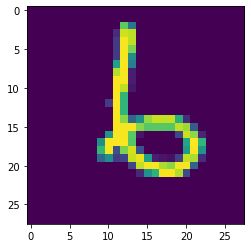

1/1 [==============================] - 0s 22ms/step
정답은 ===> 1 예측은 ===> [[1]] 결과는 ===> 맞음


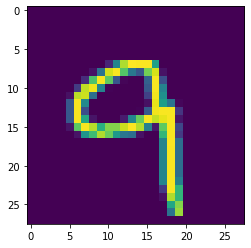

1/1 [==============================] - 0s 24ms/step
정답은 ===> 0 예측은 ===> [[0]] 결과는 ===> 맞음


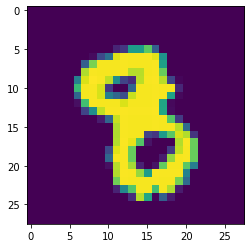

1/1 [==============================] - 0s 33ms/step
정답은 ===> 1 예측은 ===> [[1]] 결과는 ===> 맞음


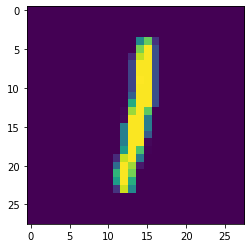

1/1 [==============================] - 0s 30ms/step
정답은 ===> 0 예측은 ===> [[0]] 결과는 ===> 맞음


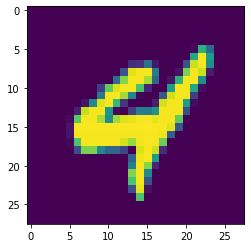

1/1 [==============================] - 0s 32ms/step
정답은 ===> 1 예측은 ===> [[1]] 결과는 ===> 맞음


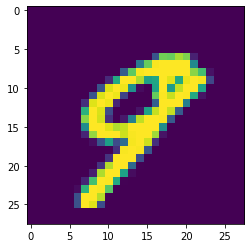

1/1 [==============================] - 0s 29ms/step
정답은 ===> 0 예측은 ===> [[0]] 결과는 ===> 맞음


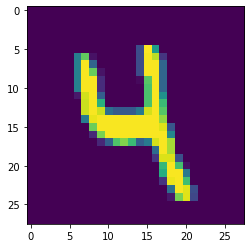

1/1 [==============================] - 0s 32ms/step
정답은 ===> 0 예측은 ===> [[0]] 결과는 ===> 맞음


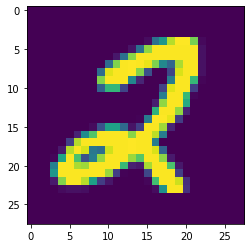

1/1 [==============================] - 0s 26ms/step
정답은 ===> 1 예측은 ===> [[1]] 결과는 ===> 맞음


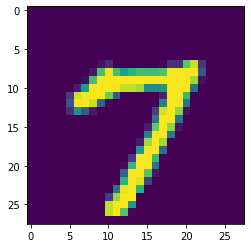

1/1 [==============================] - 0s 28ms/step
정답은 ===> 1 예측은 ===> [[1]] 결과는 ===> 맞음


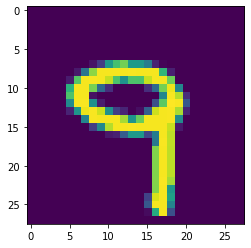


  총 10를 예측한 결과 예측율은 11111111110.000002 %


In [38]:
mnist_test2(10)

In [39]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

In [40]:
print(X_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [42]:
x1 = X_train.shape[1]
x2 = X_train.shape[2]
X_train = X_train.reshape(-1,x1*x2)
X_val = X_val.reshape(-1,x1*x2)
X_test = X_test.reshape(-1,x1*x2)

In [43]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [44]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
print(input_shape)
print(output_shape)

(784,)
10


In [45]:
# add
model1 = Sequential()
model1.add(Dense(1024, activation='relu', input_shape=input_shape))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(output_shape, activation='softmax'))

In [46]:
# 2번째 방법
model2 = Sequential(
    [
        Dense(1024, activation='relu', input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(output_shape, activation='softmax')
    ]
)

In [47]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [48]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              803840    
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy

In [50]:
# 함수형
input_ = Input(shape=input_shape)
l1 = Dense(1024, activation='relu')(input_)
l2 = Dense(512, activation='relu')(l1)
output_ = Dense(output_shape, activation='softmax')(l2)
model3 = Model([input_],outputs=[output_])

In [51]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [52]:
optimizer = RMSprop()
loss = CategoricalCrossentropy()
metrics = ['accuracy']

In [53]:
model1.compile(optimizer=optimizer,
              loss = loss,
              metrics=metrics)
model2.compile(optimizer=optimizer,
              loss = loss,
              metrics=metrics)
model3.compile(optimizer=optimizer,
              loss = loss,
              metrics=metrics)

In [54]:
model1.fit(X_train,
           y_train,
           epochs=10,
           batch_size=100,
           validation_data=(X_val,y_val))
model2.fit(X_train,
           y_train,
           epochs=10,
           batch_size=100,
           validation_data=(X_val,y_val))
model3.fit(X_train,
           y_train,
           epochs=10,
           batch_size=100,
           validation_data=(X_val,y_val))

model1_result = model1.evaluate(X_test,y_test)
model2_result = model1.evaluate(X_test,y_test)
model3_result = model1.evaluate(X_test,y_test)

Epoch 1/10
450/450 [==============================] - 17s 36ms/step - loss: 6.3678 - accuracy: 0.8753 - val_loss: 0.4775 - val_accuracy: 0.9326
Epoch 2/10
450/450 [==============================] - 16s 35ms/step - loss: 0.4509 - accuracy: 0.9313 - val_loss: 0.3056 - val_accuracy: 0.9419
Epoch 3/10
450/450 [==============================] - 16s 36ms/step - loss: 0.3127 - accuracy: 0.9460 - val_loss: 0.3145 - val_accuracy: 0.9462
Epoch 4/10
450/450 [==============================] - 15s 34ms/step - loss: 0.2616 - accuracy: 0.9558 - val_loss: 0.3309 - val_accuracy: 0.9554
Epoch 5/10
450/450 [==============================] - 16s 35ms/step - loss: 0.2496 - accuracy: 0.9608 - val_loss: 0.3415 - val_accuracy: 0.9589
Epoch 6/10
450/450 [==============================] - 16s 36ms/step - loss: 0.2261 - accuracy: 0.9668 - val_loss: 0.4919 - val_accuracy: 0.9523
Epoch 7/10
450/450 [==============================] - 16s 35ms/step - loss: 0.2004 - accuracy: 0.9705 - val_loss: 0.3415 - val_accuracy:

In [55]:
X_train.shape

(45000, 784)

In [56]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
model1 = Sequential()
l1 = Dense(1024, input_shape=input_shape,activation='sigmoid')
l2 = Dense(512,activation='sigmoid')
out = Dense(output_shape,activation='softmax')
model1.add(l1)
model1.add(l2)
model1.add(out)

model2 = Sequential(
    [
        l1,
        l2,
        out
    ]
)
input_ = Input(shape=input_shape)
layer1 = l1(input_)
layer2 = l2(layer1)
output = out(layer2)
model3 = Model(inputs=[input_], outputs=[output])

In [57]:
model1.layers[0].get_weights()

[array([[ 0.03212943,  0.05370308,  0.04350345, ...,  0.03405982,
          0.05182795,  0.04546354],
        [ 0.03674358,  0.0264985 ,  0.01318844, ..., -0.01852404,
         -0.01363496, -0.045563  ],
        [ 0.03181487, -0.04386853,  0.03841902, ..., -0.00278714,
         -0.023902  , -0.00323936],
        ...,
        [-0.01218318, -0.03084797,  0.02835209, ..., -0.01049498,
         -0.03248797,  0.0201778 ],
        [-0.02246623, -0.00717933,  0.03927913, ...,  0.05655155,
         -0.02881693,  0.02389235],
        [-0.00094338,  0.04770896,  0.0381614 , ..., -0.05416999,
         -0.01651218, -0.04751   ]], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

In [58]:
model2.layers[0].set_weights([model1.layers[0].get_weights()[0],
                             model1.layers[0].get_weights()[1]])

In [59]:
for i in range(len(model1.layers)):
    model2.layers[i].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])
    model3.layers[i+1].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])

In [60]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
model1.compile(optimizer=optimizer,
               loss=loss)
model2.compile(optimizer=optimizer,
               loss=loss)
model3.compile(optimizer=optimizer,
               loss=loss)

In [61]:
model1.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)
model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)
model3.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)
print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.1031
0.10308229923248291
313/313 [==============================] - 2s 6ms/step - loss: 0.1031
0.10308229923248291
313/313 [==============================] - 2s 7ms/step - loss: 0.1031
0.10308229923248291


In [62]:
print(np.sum(np.argmax(model1.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/len(y_test))
print(np.sum(np.argmax(model2.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/len(y_test))
print(np.sum(np.argmax(model3.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/len(y_test))

313/313 [==============================] - 2s 6ms/step
0.9717
313/313 [==============================] - 2s 6ms/step
0.9717
313/313 [==============================] - 2s 6ms/step
0.9717


In [63]:
l_1_w = model1.layers[0].get_weights()[0]
l_1_b = model1.layers[0].get_weights()[1]
#sigmoid
l_2_w = model1.layers[1].get_weights()[0]
l_2_b = model1.layers[1].get_weights()[1]
#sigmoid
l_3_w = model1.layers[2].get_weights()[0]
l_3_b = model1.layers[2].get_weights()[1]

In [64]:
a = np.dot(X_test,l_1_w) + l_1_b
a = 1/(1+np.exp(-a))
a = np.dot(a,l_2_w) + l_2_b
a = 1/(1+np.exp(-5))
a = np.dot(a,l_3_w) + l_3_b

C:\Users\admin\AppData\Local\Temp\ipykernel_9436\879591150.py:2: RuntimeWarning: overflow encountered in exp
  a = 1/(1+np.exp(-a))


In [65]:
np.sum(np.argmax(a,axis=1) == np.argmax(y_test,axis=1))/len(y_test)

C:\Users\admin\AppData\Local\Temp\ipykernel_9436\1721024450.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.sum(np.argmax(a,axis=1) == np.argmax(y_test,axis=1))/len(y_test)


0.0

In [66]:
type(l_1_w)

numpy.ndarray

In [67]:
from keras.models import load_model, save_model

In [68]:
save_model(model1,'model1.h6')
save_model(model2,'model2.h5')

INFO:tensorflow:Assets written to: model1.h6\assets


In [69]:
model1_1 = load_model('model1.h6')
model2_1 = load_model('model2.h5')

In [70]:
model1_1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1031


0.10308229923248291

In [71]:
model2_1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1031


0.10308229923248291

In [72]:
save_model(model3,'model3.h7')

INFO:tensorflow:Assets written to: model3.h7\assets


In [73]:
input_shape = X_train.shape[1:]
output_shape = y_train[1]
model1 = Sequential(
    Dense(1024,input_shape=input_shape,activation='relu'),
    Dense(512, activation='relu'),
    Dense(output_shape,activation='softmax')
)

TypeError: only size-1 arrays can be converted to Python scalars